In [1]:
import jax
import jax.numpy as jnp
from jax import pmap, vmap, jit, config
from functools import partial
import numpy as np
import time

from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt
import diffrax

import matplotlib.pyplot as plt
config.update("jax_enable_x64", True)

FP=jnp.float64

In [2]:
"""
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt
import jax.numpy as jnp

def f(t, y, args):
    return -y

term = ODETerm(f)
solver = Dopri5()
y0 = jnp.array([2., 3.])
solution = diffeqsolve(term, solver, t0=0, t1=10, dt0=0.1, y0=y0,saveat=SaveAt(ts=jnp.linspace(0, 10, 200)))

plt.plot(solution.ts, solution.ys[:, 0], label="y1")
plt.plot(solution.ts, solution.ys[:, 1], label="y2")
plt.legend()
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nfrom diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt\nimport jax.numpy as jnp\n\ndef f(t, y, args):\n    return -y\n\nterm = ODETerm(f)\nsolver = Dopri5()\ny0 = jnp.array([2., 3.])\nsolution = diffeqsolve(term, solver, t0=0, t1=10, dt0=0.1, y0=y0,saveat=SaveAt(ts=jnp.linspace(0, 10, 200)))\n\nplt.plot(solution.ts, solution.ys[:, 0], label="y1")\nplt.plot(solution.ts, solution.ys[:, 1], label="y2")\nplt.legend()\nplt.show()\n'

In [3]:
#display(solution.ts.shape,solution.ys.shape)

In [4]:
#%load_ext tensorboard

In [5]:
print(jax.default_backend())
print(jax.devices())

gpu
[CudaDevice(id=0)]


In [6]:
#@jit
def christoffel(a, Q, rs, y):
    x = jnp.array([y[0],y[1],y[2],y[3]])
    v = jnp.array([y[4],y[5],y[6],y[7]])
    x0 = x[1]**3
    x1 = rs*x0
    x2 = Q**2
    x3 = x[1]**2
    x4 = x2*x3
    x5 = a**2
    x6 = jnp.cos(x[2])
    x7 = x6**2
    x8 = x5*x7
    x9 = rs*x[1]
    x10 = -x1 + x2*x8 + x4 - x8*x9
    x11 = x2 - x9
    x12 = jnp.sin(x[2])
    x13 = x12**2
    x14 = x13*x5
    x15 = x3 + x8
    x16 = x14 + x15
    x17 = x11*x16
    x18 = x10*x17
    x19 = x14 - x2 - x5 + x8 + x9
    x20 = -x19
    x21 = x[1]**6
    x22 = a**4
    x23 = x22*x3
    x24 = x[1]**4
    x25 = 2*x5
    x26 = a**6
    x27 = x14*x24
    x28 = x13*x23
    x29 = x1*x14
    x30 = jnp.cos(4*x[2])
    x31 = (1/8)*x30
    x32 = 1/8 - x31
    x33 = x22*x32
    x34 = x14*x4
    x35 = x2*x22
    x36 = x21 - x23*x32 + 2*x23*x7 + x23 + x24*x25 + x24*x8 - x26*x32 + x26*x7 - x27 - x28 + x29 - x32*x35 + x33*x9 - x34
    x37 = a*v[0]
    x38 = x14*x9
    x39 = -x14*x3 + x24
    x40 = x22 + x25*x3
    x41 = -x13*x2*x5 - x13*x22 + x38 + x39 + x40
    x42 = 2*x13*x22
    x43 = 2*x3
    x44 = x14*x41 + x15*(-2*x14*x2 - x14*x43 + x24 + 2*x38 + x40 - x42)
    x45 = -x11*x16
    x46 = x12*x6
    x47 = 2*v[2]
    x48 = 2*x[1]
    x49 = rs*x15
    x50 = x11*x48 + x49
    x51 = x10*x14
    x52 = x50*x51
    x53 = x15*x48
    x54 = -x14
    x55 = x11 + x3 + x5
    x56 = x48*(x54 + x55) + x49 - x53
    x57 = x14*x49 - x41*x48 + x53*(x25 + x43 + x54)
    x58 = v[3]*x13
    x59 = x15**2
    x60 = x[1]**5
    x61 = x22*x9
    x62 = x24*x5
    x63 = x12**4
    x64 = 2*x13
    x65 = 1/(x59*(-rs*x60 - x1*x25 + x2*x24 + x21 + x23*x63 + 3*x23 + x25*x4 + x26*x63 - x26*x64 + x26 - 2*x27 - 4*x28 + 2*x29 - 2*x34 + x35*x63 - x35*x64 + x35 + x42*x9 - x61*x63 - x61 + 3*x62))
    x66 = x55**2
    x67 = v[1]**2
    x68 = 2*x[2]
    x69 = x5*jnp.sin(x68)
    x70 = v[2]*x55
    x71 = x59*x70
    x72 = v[0]**2
    x73 = v[3]**2
    x74 = 1/(x15**3*x55)
    x75 = jnp.cos(x68)
    x76 = x5*x75
    x77 = rs*x26
    x78 = x35*x[1]
    x79 = (1/2)*rs
    x80 = rs*x23
    x81 = x0*x2*x25
    x82 = x30 + 1
    x83 = x10 + x22*x7 + x3*x5 + x3*x8 - x33 + x39

    ch0 = x65*(a*x46*x47*(-v[3]*(x10*x44 + x36*x45) - x37*(x18 + x20*x36)) + v[1]*(-a*x58*(x10*x57 + x36*x50) + v[0]*(x36*x56 + x52)))
    ch1 = x74*(-x37*x50*x58*x66 + (1/2)*x59*x67*(x15*(-rs + 2*x[1]) - x48*x55) + (1/2)*x66*(x13*x57*x73 + x56*x72) + x71*(v[1]*x69 + x70*x[1]))
    ch2 = x74*(x46*x55*(2*v[3]*x17*x37 + x19*x5*x72 + x44*x73) - 1/8*x67*x69*(x43 + x5 + x76)**2 + x71*(-v[1]*x48 + (1/2)*v[2]*x69))
    ch3 = x65*(v[1]*x12*(v[3]*(x52 - x57*x83) + x37*(-rs*x21 + 2*x2*x60 + x23*x75*x79 - x24*x76*x79 + (1/16)*x30*x77 + (1/4)*x30*x78 - x31*x80 - x62*x79 + (15/32)*x75*x77 + x75*x78 + x75*x81 + (1/8)*x77*x82 + (1/32)*x77*jnp.cos(6*x[2]) + (3/16)*x77 + (3/4)*x78 + (1/4)*x80*x82 + (1/8)*x80 + x81)) + x47*x6*(-v[3]*(x14*x18 + x44*x83) + x37*(x20*x51 + x45*x83)))/x12

    return jnp.array([v[0],v[1],v[2],v[3],ch0, ch1, ch2, ch3])

In [17]:
# Sphere boundary checks
#@jit
def gomb(sugar, x):
    """
    Check if point is inside sphere (x[1] < sugar).
    
    Args:
        sugar: Sphere radius
        x: Position array [x0, x1, x2, ...]
    
    Returns:
        Boolean: True if inside sphere
    """
    return x[1] - sugar

# Disk crossing detection functions
#@jit
def disk(sugar_kicsi, sugar_nagy, x):
    """
    Check if trajectory crosses disk in both directions (Minkowski disk crossing).
    
    Args:
        sugar_kicsi: Inner radius
        sugar_nagy: Outer radius  
        x: position array
        
    Returns:
        Boolean: True if crosses disk in either direction
    """
    # Check if x1[1] is in the radial range
    in_radial_range = jnp.maximum((sugar_kicsi - x[1]), (x[1] - sugar_nagy))
    
    # asin(1.0) = π/2
    half_pi = jnp.pi / 2
    
    # Check both crossing directions
    crosses_up = jnp.abs(x[2] - half_pi)-0.02
    
    return jnp.maximum(crosses_up,in_radial_range)

#@jit
def ijk_to_n(i, j, k, MAGAS, D):
    """
    Convert 3D indices to linear index.
    
    Args:
        i, j, k: 3D indices
        MAGAS: Height dimension (from hole.MAGAS)
        D: Depth dimension (constant D)
        
    Returns:
        Linear index
    """
    return i * MAGAS * D + j * D + k

In [18]:
#@jit
def ijk_to_vec_mink_zoom(i, j, SZELESregi, MAGASregi, ikezd, jkezd, iveg, kepernyo_tav,kepernyo_high,SZELES,MAGAS):
    x = kepernyo_tav;
        
    ir = FP(ikezd) + (FP(i) / FP(SZELES)) * (FP(iveg) - FP(ikezd));
    jr = FP(jkezd) + (FP(j) / FP(SZELES)) * (FP(iveg) - FP(ikezd));

    y = (kepernyo_high / MAGASregi) * (FP(MAGASregi) / 2 - FP(jr));
    z = (kepernyo_high / MAGASregi) * (FP(ir) - FP(SZELESregi) / 2);

    norm = jnp.sqrt(x * x + y * y + z * z);
        
    return jnp.array([1.0, x / norm, y / norm, z / norm])

In [19]:
#bug to bug free translation
#@jit
def ijk_to_vec_zoom(i, j, Omega, SZELESregi, MAGASregi, ikezd, jkezd, iveg,kepernyo_tav,kepernyo_high,SZELES,MAGAS, a, Q, rs, r_0, theta_0):
    x = ijk_to_vec_mink_zoom(i, j,SZELESregi,MAGASregi,ikezd,jkezd,iveg,kepernyo_tav,kepernyo_high,SZELES,MAGAS)
    phi = jnp.linalg.norm(Omega, ord=2)
    

    u=jnp.where(phi == 0.0, jnp.array([1.0,0.0,0.0]), Omega/phi)


    x1 = (jnp.cos(phi) + u[0] * u[0] * (1 - jnp.cos(phi))) * x[1] + (u[0] * u[1] * (1 - jnp.cos(phi)) - u[2] * jnp.sin(phi)) * x[2] + (u[0] * u[2] * (1 - jnp.cos(phi)) + u[1] * jnp.sin(phi)) * x[3]
    x2 = (u[0] * u[1] * (1 - jnp.cos(phi) + u[2] * jnp.sin(phi))) * x[1] + (jnp.cos(phi) + u[1] * u[1] * (1 - jnp.cos(phi))) * x[2] + (u[1] * u[2] * (1 - jnp.cos(phi) + u[0] * jnp.sin(phi))) * x[3]
    x3 = (u[0] * u[2] * (1 - jnp.cos(phi)) - u[1] * jnp.sin(phi)) * x[1] + (u[1] * u[2] * (1 - jnp.cos(phi)) + u[0] * jnp.sin(phi)) * x[2] + (jnp.cos(phi) + u[2] * u[2] * (1 - jnp.cos(phi))) * x[3]
    
    #bug to bug version
    #x1 = (jnp.cos(phi) + u[0] * u[0] * (1 - jnp.cos(phi))) * x[1] + (u[0] * u[1] * (1 - jnp.cos(phi)) - u[2] * jnp.sin(phi)) * x[2] + (u[0] * u[2] * (1 - jnp.cos(phi)) + u[1] * jnp.sin(phi)) * x[3]
    #x2 = (u[0] * u[1] * (1 - jnp.cos(phi) + u[2] * jnp.sin(phi))) * x1 + (jnp.cos(phi) + u[1] * u[1] * (1 - jnp.cos(phi))) * x[2] + (u[1] * u[2] * (1 - jnp.cos(phi) + u[0] * jnp.sin(phi))) * x[3]
    #x3 = (u[0] * u[2] * (1 - jnp.cos(phi)) - u[1] * jnp.sin(phi)) * x1 + (u[1] * u[2] * (1 - jnp.cos(phi)) + u[0] * jnp.sin(phi)) * x2 + (jnp.cos(phi) + u[2] * u[2] * (1 - jnp.cos(phi))) * x[3]
    
    
    x=jnp.array([x[0],x1,x2,x3])

    delta = r_0 * r_0 - 4 * rs * r_0 + a * a + Q * Q
    rho = jnp.sqrt(r_0 * r_0 + a * a * jnp.cos(theta_0) * jnp.cos(theta_0))

    x0 = x[0] * (a * a + r_0 * r_0) * rho / ((a * a * jnp.cos(theta_0) * jnp.cos(theta_0) + r_0 * r_0) * jnp.sqrt(delta)) + x[3] * a * rho / (jnp.sqrt(delta) * (a * a * jnp.cos(theta_0) * jnp.cos(theta_0) + r_0 * r_0))
    x1 = jnp.sqrt(delta) / rho * x[1]
    x2 = x[2] / rho
    x3 = x[0] * a * rho * jnp.sin(theta_0) / (a * a * jnp.cos(theta_0) * jnp.cos(theta_0) + r_0 * r_0) + x[3] * rho / (jnp.sin(theta_0) * (r_0 * r_0 + a * a * jnp.cos(theta_0) * jnp.cos(theta_0)));
    #bug to bug translation
    #x3 = x0 * a * rho * jnp.sin(theta_0) / (a * a * jnp.cos(theta_0) * jnp.cos(theta_0) + r_0 * r_0) + x[3] * rho / (jnp.sin(theta_0) * (r_0 * r_0 + a * a * jnp.cos(theta_0) * jnp.cos(theta_0)));
    
    x=jnp.array([x0,x1,x2,x3])


    return x

In [20]:
from jax import lax
#@jit
def ray_step(i, j, SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0,
             kepernyo_high, kepernyo_tav, sugar_ki,
             gyuru_sugar_kicsi, gyuru_sugar_nagy,
             SZELESregi, MAGASregi, ikezd, jkezd, iveg):
    """
    Pure JAX version of your ray-stepper.
    """

    # initial direction vector
    v = ijk_to_vec_zoom(i, j, Omega, SZELESregi, MAGASregi,
                        ikezd, jkezd, iveg,
                        kepernyo_tav, kepernyo_high,
                        SZELES, MAGAS, a, Q, rs, x[1], x[2])

    # Schwarzschild radius test
    disc = rs * rs - 4 * (a * a + Q * Q)
    sugar_be = jnp.where(disc > 0.0,
                         (rs + jnp.sqrt(disc)) / 2 + 0.001,
                         0.0)

    sugar_kicsi = gyuru_sugar_kicsi
    sugar_nagy = gyuru_sugar_nagy

    def disk_event(t,x):
        return disk(sugar_kicsi, sugar_nagy, x)
    def be_event(t,x):
        return gomb(sugar_be, x)
    def ki_event(t,x):
        return -gomb(sugar_ki, x)
    def chrisroffel_xv(t,y,args):
        return christoffel(a,Q,rs,y)
    def combined_cond_fn(t, y, args, **kwargs):
        # Return True if ANY event condition is met
        return jnp.min(jnp.array([disk_event(t, y),be_event(t, y), ki_event(t, y)]))

    y_init=jnp.array([x[0],x[1],x[2],x[3],v[0],v[1],v[2],v[3]])

    stepsize_controller = diffrax.PIDController(rtol=1e-10, atol=1e-10)

    
    event = diffrax.Event(cond_fn=combined_cond_fn)
    solution = diffrax.diffeqsolve(
        diffrax.ODETerm(chrisroffel_xv),
        diffrax.Dopri5(),
        t0=0,
        t1=30,
        dt0=0.001,
        y0=y_init,
        event=event,
        #saveat=SaveAt(ts=jnp.linspace(0, 10, 200)),
        stepsize_controller=stepsize_controller
    )

    def event_detection(x):
        out1 = jnp.where(be_event(0, x)<0, -1, -99)
        out2 = jnp.where((out1 == -99) & (ki_event(0, x)<0), 0, out1)
        half_pi = jnp.pi / 2
        out3 = jnp.where((out2 == -99) & (disk_event(0, x)<0), 3*(x[2] - half_pi)/jnp.abs(x[2] - half_pi), out2)
        return out3

    # if loop ends without hitting anything, return -2
    return event_detection(solution.ys[0])


In [21]:
kepernyoSZELES = 10240
kepernyoMAGAS = 5120


SZELES=1024
MAGAS=512

errormax = 0.0001
de0 = 0.01

rs = 0.05  # 2*rs = m

delta_a = 0.0001

a = 0.024#0.026  # rs / 2 - delta_a  # 0.0
Q = 0.0

t_0 = 0.0
r_0 = 0.9
theta_0 = 1.57 + 0.06  # ne legyen nulla
phi_0 = 0.0

kepernyo_high = 0.5
kepernyo_tav = 0.75  # 0.4 #0.75

sugar_ki = 1.01

gyuru_sugar_kicsi = 0.1
gyuru_sugar_nagy = 0.5

# D = 4 if you’re matching the array size in C++
x = jnp.array([t_0, r_0, theta_0, phi_0])

pi_cucc = np.arcsin(1) * 2  # == math.pi
Omega = jnp.array([ 0,pi_cucc,0 ])

SZELESregi = SZELES
MAGASregi = MAGAS

ikezd = 0
jkezd = 0
iveg = SZELES

In [22]:
#sol=ray_step(12, 10, SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)

In [23]:
#display(sol)

In [24]:
# Your existing vectorization should work:
vectorized_ray_step = jax.jit(vmap(
    vmap(ray_step,  # Change this to the new function name
         in_axes=(None, 0, None, None, None, None, None, None, None, None, None, 
                 None, None, None, None, None, None, None, None, None, None)),
    in_axes=(0, None, None, None, None, None, None, None, None, None, None,
            None, None, None, None, None, None, None, None, None, None)))# ,static_argnames=['SZELES', 'MAGAS', 'a', 'Q', 'rs', 'errormax', 'de0', 'kepernyo_high', 'kepernyo_tav', 'sugar_ki', 'gyuru_sugar_kicsi', 'gyuru_sugar_nagy', 'SZELESregi', 'MAGASregi'] )

def makeframe_T(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg):
    start = time.time()


    # Apply to all coordinates
    i_coords = jnp.arange(SZELES)  # [0, 1, 2, ..., SZELES-1]
    j_coords = jnp.arange(MAGAS)   # [0, 1, 2, ..., MAGAS-1]


    
    # Apply to all coordinates
    SZIN = vectorized_ray_step(i_coords, j_coords,SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)
    
    SZIN.block_until_ready()
    end = time.time()
    print(end-start)

    return SZIN

In [25]:
"""
start = time.time()
i_coords = jnp.arange(SZELES)  # [0, 1, 2, ..., SZELES-1]
j_coords = jnp.arange(MAGAS)   # [0, 1, 2, ..., MAGAS-1]
vectorized_ray_step_compiled=vectorized_ray_step.lower(i_coords, j_coords, SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg).compile()
end = time.time()
print(end-start)

vectorized_ray_step_compiled.cost_analysis()['flops']
"""

"\nstart = time.time()\ni_coords = jnp.arange(SZELES)  # [0, 1, 2, ..., SZELES-1]\nj_coords = jnp.arange(MAGAS)   # [0, 1, 2, ..., MAGAS-1]\nvectorized_ray_step_compiled=vectorized_ray_step.lower(i_coords, j_coords, SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg).compile()\nend = time.time()\nprint(end-start)\n\nvectorized_ray_step_compiled.cost_analysis()['flops']\n"

63.12121772766113


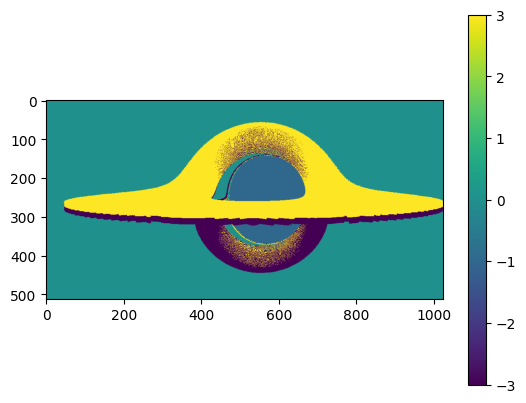

In [26]:

res=makeframe_T(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)






plt.imshow(res.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

32.20214533805847


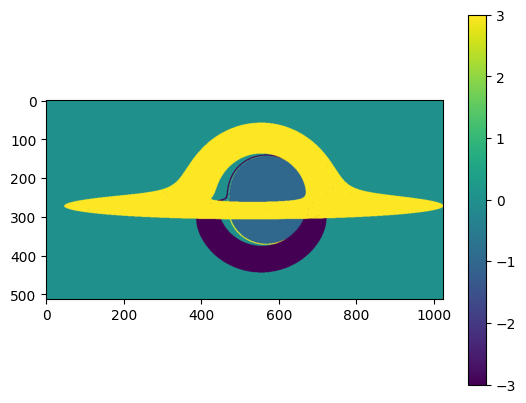

10623


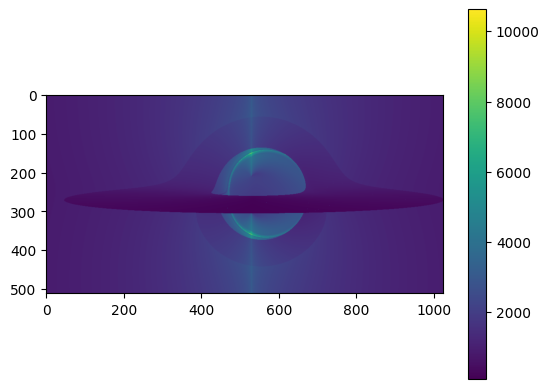

In [27]:

res,iters=makeframe_Th(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)


import numpy as np
import matplotlib.pyplot as plt



plt.imshow(res.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

print(jnp.max(iters))
plt.imshow(iters.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

In [45]:
1024*512

524288

In [150]:
iters.std()

Array(207.24068, dtype=float32)

5.157258987426758


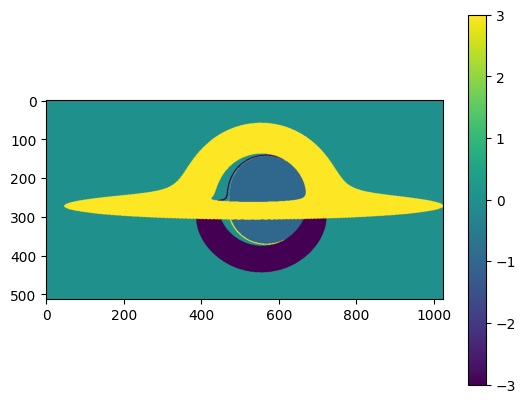

2753


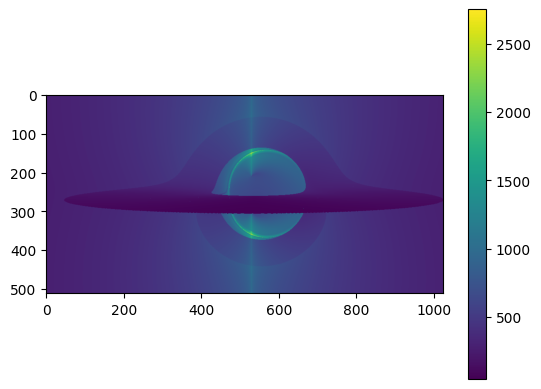

In [148]:


res,iters=makeframe_Th(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)


import numpy as np
import matplotlib.pyplot as plt



plt.imshow(res.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

print(jnp.max(iters))
plt.imshow(iters.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

In [113]:

hlo=vectorized_ray_step.lower(i_coords, j_coords,SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg).compiler_ir(dialect="hlo")
print(hlo.as_hlo_text()) 

HloModule jit_ray_step_2, entry_computation_layout={(s32[1024]{0}, s32[512]{0}, s32[], f32[4]{0}, f32[3]{0}, /*index=5*/f32[], f32[], f32[], f32[], f32[], /*index=10*/f32[], f32[], f32[], f32[], f32[], /*index=15*/s32[], s32[], s32[], s32[], s32[])->(s32[1024,512]{1,0}, s32[1024,512]{1,0})}

ijk_to_vec_mink_zoom.1 {
  constant.13 = f32[] constant(1)
  broadcast_in_dim.8 = f32[1024,512,1]{2,1,0} broadcast(constant.13), dimensions={}
  Arg_7.3 = f32[] parameter(7)
  div.26 = f32[1024,512]{1,0} broadcast(Arg_7.3), dimensions={}
  mul.19 = f32[] multiply(Arg_7.3, Arg_7.3)
  add.17 = f32[512]{0} broadcast(mul.19), dimensions={}
  Arg_8.3 = f32[] parameter(8)
  Arg_3.3 = s32[] parameter(3)
  convert_element_type.24 = f32[] convert(Arg_3.3)
  div.22 = f32[] divide(Arg_8.3, convert_element_type.24)
  mul.15 = f32[512]{0} broadcast(div.22), dimensions={}
  convert_element_type.25 = f32[] convert(Arg_3.3)
  constant.14 = f32[] constant(2)
  div.23 = f32[] divide(convert_element_type.25, constant

In [101]:
@jax.jit
def f(x):
    return x**410

f(10)

# Get HLO
hlo = f.lower(jnp.float32(10)).compiler_ir(dialect="hlo")
print(hlo.as_hlo_text()) 

HloModule jit_f, entry_computation_layout={(f32[])->f32[]}

ENTRY main.1 {
  x.1 = f32[] parameter(0)
  mul.12 = f32[] multiply(x.1, x.1)
  mul.13 = f32[] multiply(mul.12, mul.12)
  mul.14 = f32[] multiply(mul.13, mul.13)
  mul.15 = f32[] multiply(mul.12, mul.14)
  mul.16 = f32[] multiply(mul.14, mul.14)
  mul.17 = f32[] multiply(mul.15, mul.16)
  mul.18 = f32[] multiply(mul.16, mul.16)
  mul.19 = f32[] multiply(mul.18, mul.18)
  mul.20 = f32[] multiply(mul.19, mul.19)
  mul.21 = f32[] multiply(mul.17, mul.20)
  mul.22 = f32[] multiply(mul.20, mul.20)
  ROOT mul.23 = f32[] multiply(mul.21, mul.22)
}




In [85]:
@jax.jit
def f(x):
    return x**32

# Lower the computation
lowered = f.lower(jnp.ones((), jnp.float32))

# Lower and get XLA computation (not MLIR)
comp = f.lower(jnp.ones((), jnp.float32)).compiler_ir()
print(comp)

module @jit_f attributes {mhlo.num_partitions = 1 : i32, mhlo.num_replicas = 1 : i32} {
  func.func public @main(%arg0: tensor<f32>) -> (tensor<f32> {jax.result_info = "result"}) {
    %0 = stablehlo.multiply %arg0, %arg0 : tensor<f32>
    %1 = stablehlo.multiply %0, %0 : tensor<f32>
    %2 = stablehlo.multiply %1, %1 : tensor<f32>
    %3 = stablehlo.multiply %2, %2 : tensor<f32>
    %4 = stablehlo.multiply %3, %3 : tensor<f32>
    return %4 : tensor<f32>
  }
}



In [102]:

v_test = ijk_to_vec_zoom(12, 35, Omega, SZELESregi, MAGASregi,
                        ikezd, jkezd, iveg,
                        kepernyo_tav, kepernyo_high,
                        SZELES, MAGAS, a, Q, rs, x[1], x[2])
hlo = christoffel.lower(a, Q, rs, x, v_test).compiler_ir(dialect="hlo")
hlo_cost=christoffel.lower(a, Q, rs, x, v_test)
print(hlo.as_hlo_text())

HloModule jit_christoffel, entry_computation_layout={(f32[], f32[], f32[], f32[4]{0}, f32[4]{0})->f32[4]{0}}

ENTRY main.1 {
  constant.22 = f32[] constant(1)
  x.1 = f32[4]{0} parameter(3)
  slice.33 = f32[1]{0} slice(x.1), slice={[1:2]}
  squeeze.33 = f32[] reshape(slice.33)
  integer_pow.18 = f32[] multiply(squeeze.33, squeeze.33)
  a.1 = f32[] parameter(0)
  integer_pow.19 = f32[] multiply(a.1, a.1)
  slice.34 = f32[1]{0} slice(x.1), slice={[2:3]}
  squeeze.34 = f32[] reshape(slice.34)
  cos.4 = f32[] cosine(squeeze.34)
  integer_pow.20 = f32[] multiply(cos.4, cos.4)
  mul.202 = f32[] multiply(integer_pow.19, integer_pow.20)
  add.86 = f32[] add(integer_pow.18, mul.202)
  integer_pow.22 = f32[] multiply(add.86, add.86)
  rs.1 = f32[] parameter(2)
  neg.20 = f32[] negate(rs.1)
  slice.44 = f32[1]{0} slice(x.1), slice={[1:2]}
  squeeze.44 = f32[] reshape(slice.44)
  mul.268 = f32[] multiply(squeeze.44, squeeze.44)
  mul.269 = f32[] multiply(mul.268, mul.268)
  mul.270 = f32[] multipl

In [87]:

v_test = ijk_to_vec_zoom(12, 35, Omega, SZELESregi, MAGASregi,
                        ikezd, jkezd, iveg,
                        kepernyo_tav, kepernyo_high,
                        SZELES, MAGAS, a, Q, rs, x[1], x[2])
hlo_cost=christoffel.lower(a, Q, rs, x, v_test).compiler_ir().cost_analysis()
print(hlo_cost)

AttributeError: 'jaxlib.mlir._mlir_libs._mlir.ir.Module' object has no attribute 'cost_analysis'

In [124]:

res,iters=makeframe_T(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg);


ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[]
It arose in the jnp.arange argument 'stop'
The error occurred while tracing the function makeframe_T_inner at /tmp/ipykernel_6660/1621924158.py:8 for jit. This concrete value was not available in Python because it depends on the value of the argument SZELES.

See https://docs.jax.dev/en/latest/errors.html#jax.errors.ConcretizationTypeError

2753


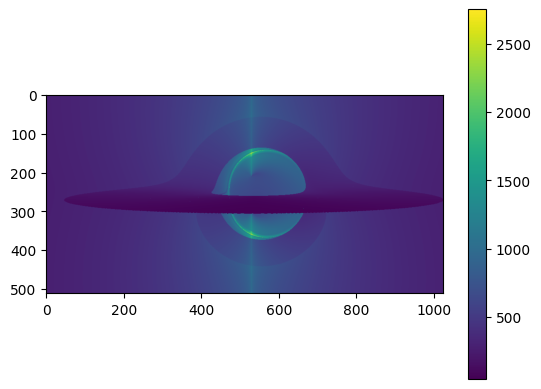

In [117]:
import numpy as np
import matplotlib.pyplot as plt


print(jnp.max(iters))
plt.imshow(iters.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()

In [78]:
res=makeframe_Tg(SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg);


23.279309272766113


In [17]:
i_coords = jnp.arange(SZELES)  # [0, 1, 2, ..., SZELES-1]
j_coords = jnp.arange(MAGAS)   # [0, 1, 2, ..., MAGAS-1]
with jax.profiler.trace("./jax-trace", create_perfetto_link=True):
    # Apply to all coordinates
    res = vectorized_ray_step(i_coords, j_coords,SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)

    res.block_until_ready()
    #jax.profiler.stop_trace()


Open URL in browser: https://ui.perfetto.dev/#!/?url=http://127.0.0.1:9001/perfetto_trace.json.gz


127.0.0.1 - - [06/Oct/2025 00:02:25] code 404, message File not found
127.0.0.1 - - [06/Oct/2025 00:02:25] "POST /status HTTP/1.1" 404 -
127.0.0.1 - - [06/Oct/2025 00:02:25] code 404, message File not found
127.0.0.1 - - [06/Oct/2025 00:02:25] "POST /status HTTP/1.1" 404 -
127.0.0.1 - - [06/Oct/2025 00:02:27] "GET /perfetto_trace.json.gz HTTP/1.1" 200 -


In [35]:
"""with jax.profiler.trace("/tmp/jax-trace", create_perfetto_link=True):
  # Run the operations to be profiled
  key = jax.random.key(0)
  x = jax.random.normal(key, (5000, 5000))
  y = x @ x
  y.block_until_ready()"""

'with jax.profiler.trace("/tmp/jax-trace", create_perfetto_link=True):\n  # Run the operations to be profiled\n  key = jax.random.key(0)\n  x = jax.random.normal(key, (5000, 5000))\n  y = x @ x\n  y.block_until_ready()'

In [89]:
szin=res
szin

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32, weak_type=True)

In [90]:
"""
szin=np.empty((SZELES,MAGAS),dtype=np.float64)
for i in range(SZELES):
    for j in range(MAGAS):
        print(i,j)
        szin[i][j]=ray_step(i, j,SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)
""" 

'\nszin=np.empty((SZELES,MAGAS),dtype=np.float64)\nfor i in range(SZELES):\n    for j in range(MAGAS):\n        print(i,j)\n        szin[i][j]=ray_step(i, j,SZELES, MAGAS, x, Omega, a, Q, rs, errormax, de0, kepernyo_high, kepernyo_tav, sugar_ki, gyuru_sugar_kicsi, gyuru_sugar_nagy, SZELESregi, MAGASregi, ikezd, jkezd, iveg)\n'

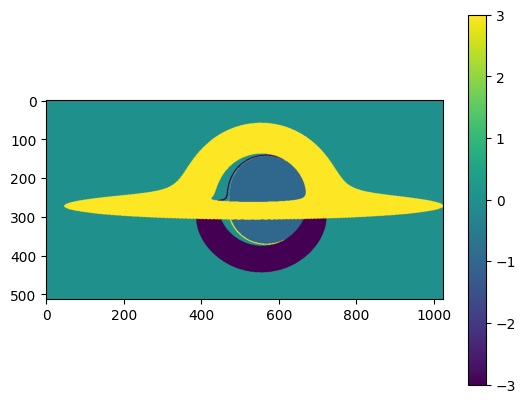

In [91]:
import numpy as np
import matplotlib.pyplot as plt



plt.imshow(szin.T)  # 'gray' colormap for grayscale image
plt.colorbar()                   # optional: show a color scale
plt.show()


In [15]:
from PIL import Image
import numpy as np

matrix=np.array(szin.T)
# Scale values to 0–255 if needed
matrix_scaled = (255 * (matrix - matrix.min()) / (matrix.ptp())).astype(np.uint8)

# Make a grayscale image
img = Image.fromarray(matrix_scaled, mode='L')

# Save as PNG
img.save("matrix.png")


In [16]:
from PIL import Image

from datetime import datetime
from math import log

import struct


now = datetime.now() # current date and time

im=[]

num_of_frames=100

for num in range(num_of_frames):

    xmax=0.0
    img = Image.new( 'RGB', (b,a), "black") # Create a new black image
    pixels = img.load() # Create the pixel map
    for i in range(img.size[0]):    # For every pixel:
        for j in range(img.size[1]):
            x=struct.unpack('f', file.read(4))[0]
            if(xmax<x):
                xmax=x
            if (x==0):
                pixels[i,j] = (0, 0, 0)
            elif(x==-1):
                pixels[i,j] = (0, 0, 0)#(255, 0, 0)#(255, 255, 255)#
            else:
                
                T=x/0.5*256*4
                r=1.1
                if((T//256)%3==0):
                    T=T%256
                    pixels[i,j] = (int(255-T/r), 0, 0)
                elif((T//256)%3==1):
                    T=T%256
                    pixels[i,j] = (0, int(255-T/r), 0)
                elif((T//256)%3==2):
                    T=T%256
                    pixels[i,j] = (0, 0, int(255-T/r))
                #pixels[i,j] = (0, 255, 0) ha 1 szinure akarjuk
                    
                
    im.append(img)
    
    #nevex="blackholle"+now.strftime("%m_%d_%Y_%H_%M_%S")+"__"+str(num)
    #windows#"C:\\Users\\elekp\\source\\repos\\kerr_class_szines_kep\\kerr_class_szines_kep\\kepekx\\blackholle"+now.strftime("%m_%d_%Y_%H_%M_%S")+"__"+str(num)
    #img.save(nevex+".png")
        
print(xmax)
#img.show()
neve="blackhole"
#"C:\\Users\\elekp\\source\\repos\\kerr_class_szines_kep\\kerr_class_szines_kep\\kepekx\\blackholle"+now.strftime("%m_%d_%Y_%H_%M_%S")

agif=Image.new( 'RGB', (b,a), "black")
agif=im[0]

for num in range(num_of_frames):
    im.append(im[num_of_frames-num-1])



agif.save(neve+".gif",save_all=True, append_images=im,loop=0)

print("kesz")

NameError: name 'b' is not defined